# Generating a dataset and  forward propagation

Let's start by generating a dataset. Scikit-learn is a very nice tool for machine learning. It includes several dataset. We will use one of them. Then we will define the size of our neurql network, the activation function and see how foward propagation will work exactly in our case.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

In [2]:
# magic command to plot inside the notebook
%matplotlib inline 
# you can customize the plot size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

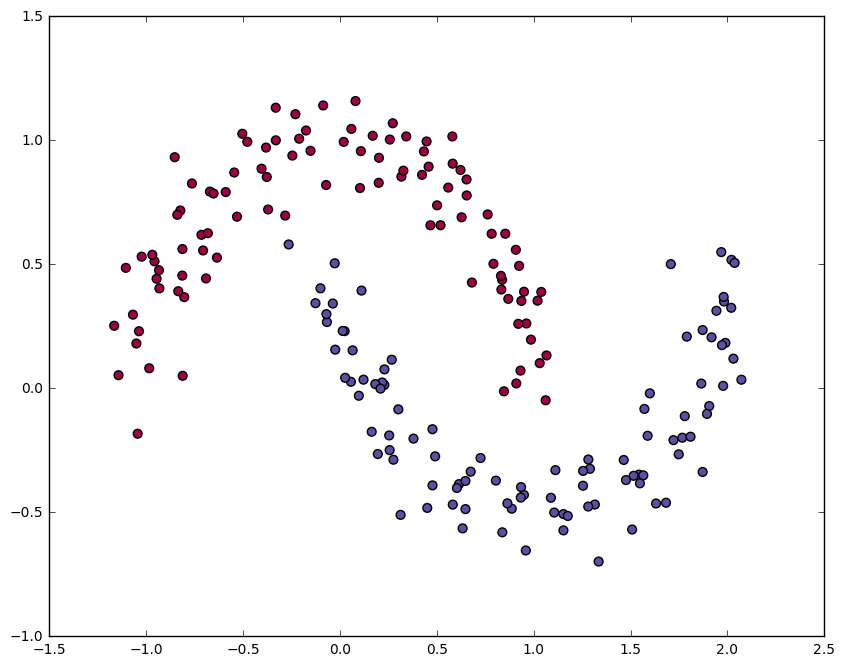

In [5]:
# Generate a dataset and plot it

# The seed allow us to predict random numbers, it's easier to debug
np.random.seed(0)

X, y = sklearn.datasets.make_moons(200, noise=0.10)
# change the noise here to see how it affects the data

# The dataset is labeled by 0 and 1
# So we can plot by using matplotlib

plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

We have now a nice dataset which we can use for our neural network. The job is to classify those data. In other words, your NN has to seperate both population of points. You can change the noise as you want, increasing it will make the classification more challenging for the NN.

# NN characteristics, loss function and feedforward

Now we have the dataset, let's talk about what neural network we will code.  
First, we have to predict 2 categories (blue and red, male and female, 0 and 1, etc). So we need at least 1 output. We will code **2 outputs** in order to re-use our NN later if necessary.  
About the inputs, we have $x$ and $y$ so we will have **2 inputs**.  
In-between, we will have what we call hidden layer(s). The more we have, the more we can approximate our function. But let's make it simple, we will use **1 hidden layer** and will make customizable the number of neurons in this layer.

![Our Neural Network](images/NN_basic.png "Our Neural Network")

Now we have to choose our activation function. This function will take an input and tranform it through this function to give and output.

![Activation function](images/activation_function.png "Activation function")

To make it more simple, we will use **tanh** (c), hyperbolic tangent. It's simpler because later, we will have to derive it and $$(tanh(x))'=\frac{1}{cosh(x)^2}=1+tanh(x)^2$$  
Maybe you cannot believe me now but it's convinient. In term of computation, you can re-use $tanh$.

![FeedForward](images/nn_ff_1.png "FeedForward")

In this configuration, we have 6 matrices to manage:  
$x = \begin{bmatrix}
    x_1 \\ 
    x_2 \\
\end{bmatrix}, \quad 
W_{layer 1} = \begin{bmatrix}
    W_{1,1} & W_{1,2} \\
    W_{2,1} & W_{2,2} \\
    W_{3,1} & W_{3,2} \\
    W_{4,1} & W_{4,2} \\
    W_{5,1} & W_{5,2} \\
\end{bmatrix}, \quad
b_{layer 1} = \begin{bmatrix}
    b_1 \\
    b_2 \\
    b_3 \\
    b_4 \\
    b_5 \\
\end{bmatrix}
$. For the input of the first layer.  

$W_{layer 2} = \begin{bmatrix}
    W_{1,1} & W_{1,2} & W_{1,3} & W_{1,4} & W_{1,5} \\
    W_{2,1} & W_{2,2} & W_{2,3} & W_{2,4} & W_{2,5}\\
\end{bmatrix}, \quad
b_{layer 2} = \begin{bmatrix}
    b_1 & b_2 & b_3 & b_4 & b_5\\
\end{bmatrix}
$. For the input of the last layer. 

Then finally:  
$
\widehat Y = \begin{bmatrix}
    y_1 \\ 
    y_2\\
\end{bmatrix}
$  
Where $x$ is the inputs ($x$,$y$ on the dataset figure), $W$ is the weights, $b$ the biases and $\widehat Y$ the outputs.

We have to compute those input into the next layer. To be more concrete, we have to compute:  
$$i_1 =x\quad \times \quad W_{layer 1}\quad+\quad b_{layer 1}$$  
$$h_1 = \tanh(i_1)$$  
$$i_2=h_1\quad \times \quad W_{layer 2}\quad+\quad b_{layer 2}$$  

This part is what we call in mathematics Linear Algebra. It's matrix calculation. GPUs are specialy desgined for this kind of operations. But in our example, we will use our CPU.  
The matrices **W and b are called the model**.

At this point, we have almost all theoritical inforamtion. Let's write some code.

let's initilize the parameters we will need later:

In [6]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
nn_hdim = 5 # nb of neurons in the hidden layer

Now we need to initialize our model by putting random values. This part is actually an important topic. We will not go into details but you should read about this.

In [7]:
# Initialize the parameters to random values. We need to learn these.

# The seed make the random predictable
# So it's easier to debug
np.random.seed(0)

# We are creating matrices with the corresponding size
W1 = np.random.randn(nn_input_dim, nn_hdim) 
b1 = np.zeros((1, nn_hdim))
W2 = np.random.randn(nn_hdim, nn_output_dim) 
b2 = np.zeros((1, nn_output_dim))

We need to store our model somewhere, so we will use a python dictionnary:

In [8]:
model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

In [19]:
def feedforward(model):
    # Compute the feedforward
    
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    i1 = X.dot(W1) + b1
    h1 = np.tanh(i1)
    i2 = h1.dot(W2) + b2
    
    return i2

In [21]:
i2 =feedforward(model)
len(i2) # i2 is a tuple 

200

In [10]:
feedforward(model)

array([[  2.56899716e+00,   3.38335035e-01],
       [  2.51933534e+00,   7.33319634e-01],
       [ -1.96998816e-01,  -4.86367228e-01],
       [ -2.64291047e+00,  -6.45287843e-01],
       [  2.72969118e+00,   7.66475558e-01],
       [  2.83091097e+00,   7.85069501e-01],
       [  2.62579808e+00,   5.91164086e-01],
       [  2.11059078e+00,   6.73957055e-01],
       [  2.59375433e+00,   4.94546501e-01],
       [  2.23108516e+00,   6.86695594e-01],
       [ -1.13970165e+00,  -8.92213663e-01],
       [  7.76047886e-01,   5.35893477e-01],
       [  2.74407909e+00,   7.69951930e-01],
       [  2.47487381e+00,   7.11392474e-01],
       [ -1.90000225e+00,  -6.96393763e-01],
       [  2.61241712e+00,   6.18084845e-01],
       [  2.33975991e+00,  -5.01636579e-01],
       [  1.07606180e+00,   5.81046872e-01],
       [  1.65695889e+00,  -9.83760642e-01],
       [ -1.80031927e+00,  -7.09102322e-01],
       [  2.88178605e+00,   7.94277695e-01],
       [  2.10586398e+00,   6.71682586e-01],
       [  

As you can see, the output is not very useful. So we have to add a new function into the last layer.  This function is called softmax function. To be simple, it's converting our strange input into probabilities (between 0 and 1). Then we will take the higher probabilities from both output and we will have the classification of the input.

$$ output = \widehat{y} = softmax(i_2)$$

In [23]:
def feedforward(model, X):
    # Compute the feedforward
    
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    i1 = X.dot(W1) + b1
    h1 = np.tanh(i1)
    i2 = h1.dot(W2) + b2
    
    # the softmax part
    exp_scores = np.exp(i2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    return np.argmax(probs, axis=1)


In [12]:
output = feedforward(model, X)
print('The size of our samples is',len(X))
print('And the size of our input:',len(output))
output

The size of our samples is 200
And the size of our input: 200


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [13]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

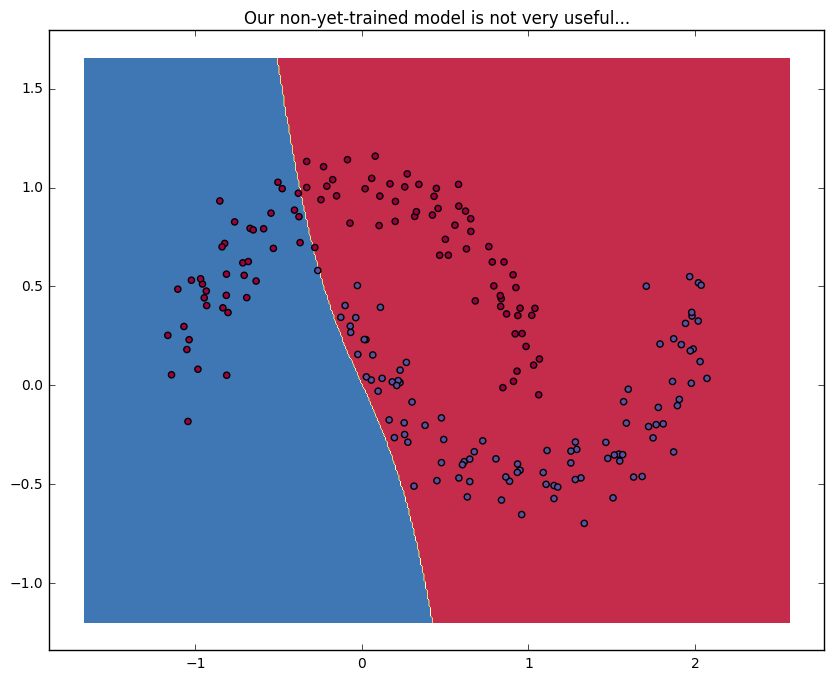

In [14]:
# Plot the decision boundary
plot_decision_boundary(lambda x: feedforward(model, x))
plt.title("Our non-yet-trained model is not very useful...")

Ok, our model is very bad! Actually, we initialized it with random values so it was expected... In the next part, we will learn to train our model!

#### cross entropy as loss function to train the model